#Что такое данные
и нафига нам вообще эта машинка
А ещё мы узнаем
* Что такое numpy и как работать с данными
* Что такое matplotlib и как строить граффики
* Что такое sklearn и какие у него есть модели
* Как быть, если ваши данные имеют не числовой формат.

#Есть время на ириску?

In [159]:
#загрузим данные
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [160]:
print "len(X) = ",len(X)
print "X.shape = ",X.shape

len(X) =  150
X.shape =  (150, 4)


In [161]:
print X[:10] #выведем первые 19 элементов

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [162]:
print X[0:10:2] #выведем элементы 0, 2, 4, 6 и 8

[[ 5.1  3.5  1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 4.6  3.4  1.4  0.3]
 [ 4.4  2.9  1.4  0.2]]


In [163]:
print X[0,2] #конкретный элемент (0 строка, 2 столбец)

1.4


In [ ]:
#выведи каждый десятый элемент Y
<твой код>

#Немного картинок

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

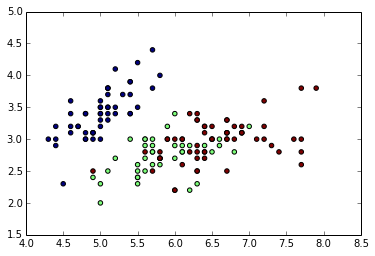

In [165]:
plt.scatter(X[:,0], X[:,1], c = Y)

In [ ]:
#построй такой же граффик по вторым 2 колонкам
<твой код>

#пора обучать машины...

In [166]:
X_train = X[0:149:2]
Y_train = Y[0:149:2]
X_test = X[1:150:2]
Y_test = Y[1:150:2]

In [ ]:
#выведи размеры Y_train
<твой код>

In [168]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 100)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [169]:
Y_pred_test = model.predict(X_test)
print Y_pred_test[::3]
print Y_test[::3]

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 2 2 2 2 2 1 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


In [170]:
from sklearn.metrics import accuracy_score
print accuracy_score(Y_test, Y_pred_test)

0.946666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

my_knn_classifier = <создай модель>
<обучи её>

In [ ]:
Y_knn_test = <предскажи класс на тестовой выборке>

In [ ]:
#Оцени точность прогноза модели на X_test
print <твой код>

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

#А теперь реальность

In [196]:
import pandas
tweets = pandas.DataFrame.from_csv("Tweets data.csv")

In [ ]:
print <размер данных>
print <первые 10 элементов данных>

In [197]:
texts = tweets["SentimentText"]
Y = tweets["Sentiment"]

In [237]:
def extract_features(text):
    features = []
    
    
    features.append(len(text))
    
    text_lower = text.lower()
    features.append(text_lower.count("sad"))
    features.append(text_lower.count(" a "))
    features.append(text_lower.count("fun"))
    features.append(text_lower.count("bitch"))
    for i in "abcdefghijklmnopqrstuvwxyz":
        for j in "abcdefghijklmnopqrstuvwxyz":
            features.append(text_lower.count(i+j))
    
    
    return features

In [238]:
import numpy
X = []
for text in texts:
    X.append(extract_features(text))
X = numpy.array(X)

X[:10]

array([[61,  1,  0, ...,  0,  0,  0],
       [51,  0,  0, ...,  0,  0,  0],
       [37,  0,  0, ...,  0,  0,  0],
       ..., 
       [61,  0,  0, ...,  0,  0,  0],
       [53,  0,  0, ...,  0,  0,  0],
       [46,  0,  0, ...,  0,  0,  0]])

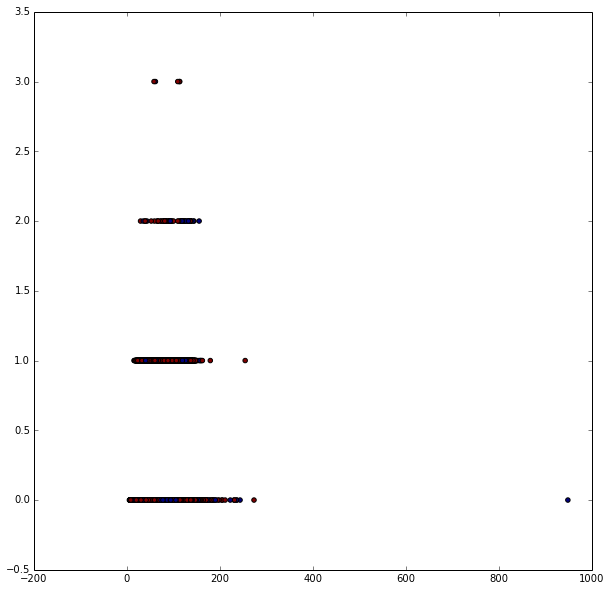

In [239]:
plt.figure(figsize=[10,10])
plt.scatter(X[:,0],X[:,3],c = Y)

In [240]:
for text in texts[X[:,3] >= 3]:
    print text 

(Singing) no fun. No fun. Cramming for ap gov test is no fun. 
@allyshaye it was sprinkling? meow, i hope it's sunny so we can have lots of fun, fun, funnn before/after classes 
@cacaubrazil OOOOO.... Traveling! fun, fun, fun  Where to?!
@Bridget_NewGirl Ah, fun, fun fun, coming up! Buy one you can take to the track!  Any ideas as to what you'll get?
@B__ Have fun have fun have fun!!!!!!!!!!  Crossing my fingers for Squirm for you...they've soundchecked it!! 


#Мы снова в деле!

In [241]:
#порежем данные
X_train = X[:70000]
Y_train = Y[:70000]
X_test = X[70000:]
Y_test = Y[70000:]

In [242]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,Y_train)

In [243]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
print "Обучение:",accuracy_score(Y_train,Y_pred_train)
print "Тест:",accuracy_score(Y_test,Y_pred_test)


Обучение: 0.689142857143
Тест: 0.68141651939
